In [68]:
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics as std
import pandas as pd
import numpy as np



In [69]:
#Este programa se uso para encontrar un valor exacto del volumen por pepa de mi mascota para predecir cuantas pepas necesito para llenar un volumén especifico
#Ademas de poder crear un factor de conversión entre peso y volumen a llenar

In [70]:
apolo = pd.read_csv('pepas de apolo - Hoja 1.csv')
x = np.arange(len(apolo['Pesocu']))


In [71]:
apolo['volumen cilindrico'] = np.pi*pow(((apolo['Alto(cm)']+apolo['Largo'])/2),2)*apolo['Profundo']
apolo['volumen rectangular']= apolo['Alto(cm)']*apolo['Largo']*apolo['Profundo']
apolo.head(2)

,Alto(cm),Largo,Profundo,Pesocu,area cilindro,volumen cilindrico,volumen rectangular
0,1.4,1.1,0.4,0.4,7.853982,1.963495,0.616
1,1.4,1.2,0.5,0.4,8.168141,2.654646,0.840


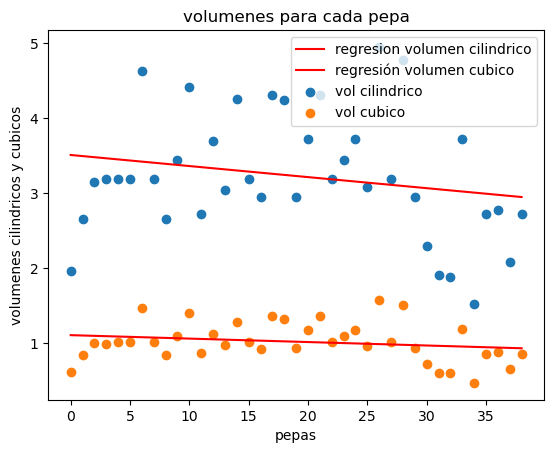

In [72]:
#regresión lineal para encontrar 
res = st.linregress(x,apolo['volumen cilindrico'])
resC = st.linregress(x,apolo['volumen rectangular'])
plt.plot(x, res.intercept + res.slope*x, 'r', label='regresion volumen cilindrico')
plt.plot(x, resC.intercept + resC.slope*x, 'r', label='regresión volumen cubico')
plt.scatter(x,apolo['volumen cilindrico'],label="vol cilindrico")
plt.scatter(x,apolo['volumen rectangular'],label="vol cubico")
plt.ylabel("volumenes cilindricos y cubicos")
plt.xlabel("pepas")
plt.title("volumenes para cada pepa")
plt.legend()
plt.show()


In [73]:

peso_pepa = apolo['Pesocu'].apply('mean')
vcTotal = round(apolo['volumen cilindrico'].apply('mean'),2)
vrTotal = round(apolo['volumen rectangular'].apply('mean'),2)
#numero de veces que se encuentra cada volumen
vc = pd.DataFrame(apolo['volumen cilindrico'].value_counts())
vr= pd.DataFrame(apolo['volumen rectangular'].value_counts())
#valores de volumenes cubicos y cilindricos
vc['valores'] = vc.index
vr['valores'] = vr.index
#volumenes organizados de menor a mayor , según su frecuencia
vc = vc.sort_values('volumen cilindrico')
vr = vr.sort_values('volumen rectangular')
print(f'el volumen cilindrico es {vcTotal} mientras que el rectangular es {vrTotal}')
print(f'el volumen promedio es de {(vcTotal + vrTotal)/2}')
vr.head(5)

el volumen cilindrico es 3.23 mientras que el rectangular es 1.02
el volumen promedio es de 2.125


,volumen rectangular,valores
1.568,1,1.568
0.990,1,0.990
1.470,1,1.470
1.404,1,1.404
0.864,1,0.864


Text(0, 0.5, 'cantidad de veces')

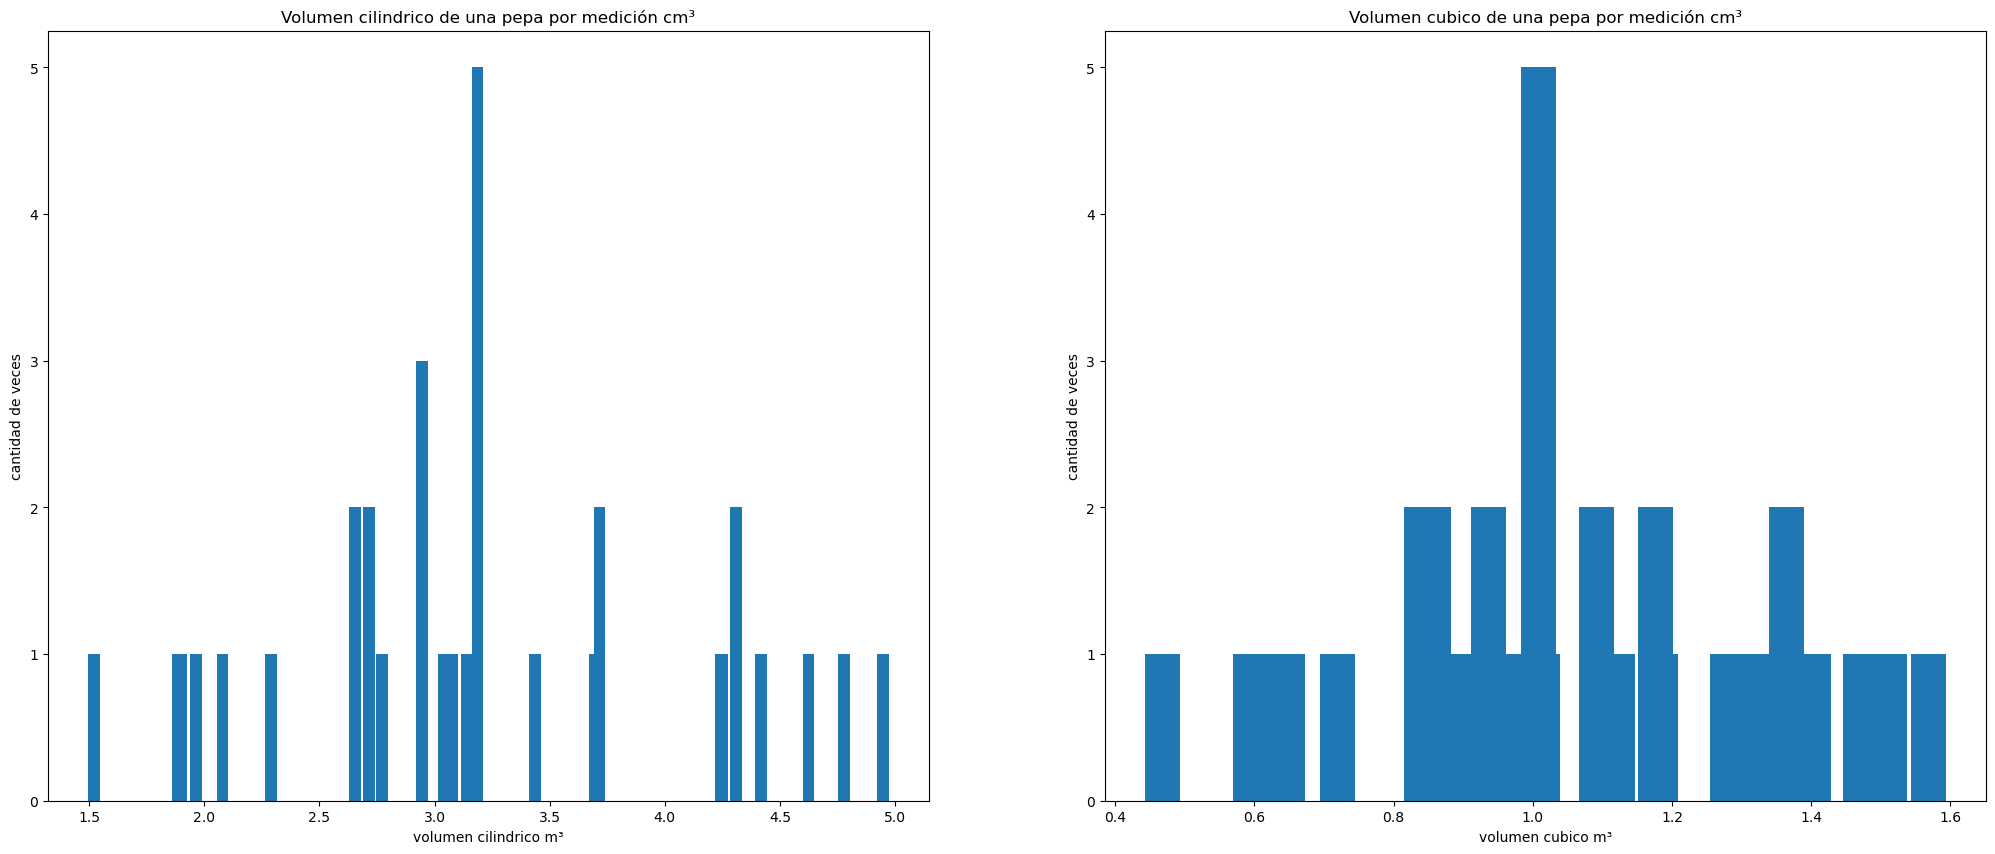

In [74]:
##Grafica de barplots para mirar la frecuencia de los volumenes según la pepa
fig,axes = plt.subplots(1,2,figsize = (25,10))
axes[0].bar(vc['valores'],vc['volumen cilindrico'],width= 0.05)
axes[0].set_title('Volumen cilindrico de una pepa por medición cm³')
axes[0].set_xlabel('volumen cilindrico m³')
axes[0].set_ylabel('cantidad de veces')
axes[1].bar(vr['valores'],vr['volumen rectangular'],width= 0.05)
axes[1].set_title('Volumen cubico de una pepa por medición cm³')
axes[1].set_xlabel('volumen cubico m³')
axes[1].set_ylabel('cantidad de veces')



In [82]:
##Se encuentra que el volumen rectangular se ajusta mejor para predecir cuantas pepas se necesitan para llenar un volumen especifico    
#1pepa = 0.4gm = 1.125cm³ = 1.125ml 
pepa = {'gm':0.4,'cm3':2.125}
#1p = 1,125ml
#cm3 = 600ml  -> cm3 = 600/1,125
cm3 = 1.16 #+- 4,125ml
ml = 4060
pepas = round(ml/cm3) #+- 4 pepas
pesoT = round(pepas * 0.4)
print(f'para {ml}ml se necesitan {pepas} pepas')
print(f'para {ml}ml pesa {pesoT} gramos')


para 4060ml se necesitan 3500 pepas
para 4060ml pesa 1400 gramos


In [83]:
import comidaPerros as cm
gr = 0.4
ml = 1.16
volumen = 600 # 600ml o m³
pepas = cm.pepasOcupanVolumen(volumen,ml)#calcula cuantas pepas se necesitan para ocupar un volumen en especifico
gramos = cm.pesoPorVolumen(volumen,gr)#calcula cuantos gramos de comida de apolo se necesitan para ocupar un volumen

se necesitan 517 pepas
pesa 240 gramos
